In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde
import scipy
from itertools import combinations, product
from tqdm import tqdm
import scipy.stats
plt.rcParams['figure.figsize'] = [10,10]

In [2]:
channels={1:'Foxp3',2:'Nur77_GFP',3:'CD4',4:'CellTraceViolet',5:'Autofl',6:'Autofl'}
Treg_1L_df=assign_channels(read_stats(r'..\240328_Nur77_cleared\1L_Statistics'),channels)
Treg_1L_df['image']='1L'
Treg_1R_df=assign_channels(read_stats(r'..\240328_Nur77_cleared\1R_Statistics'),channels)
Treg_1R_df['image']='1R'
Treg_2L_df=assign_channels(read_stats(r'..\240328_Nur77_cleared\2L_Statistics'),channels)
Treg_2L_df['image']='2L'
Treg_2R_df=assign_channels(read_stats(r'..\240328_Nur77_cleared\2R_Statistics'),channels)
Treg_2R_df['image']='2R'

In [4]:
Treg_Nur77_series=(Treg_1L_df['Intensity_Mean_Nur77_GFP'],Treg_1R_df['Intensity_Mean_Nur77_GFP'],Treg_2L_df['Intensity_Mean_Nur77_GFP'],Treg_2R_df['Intensity_Mean_Nur77_GFP'])
Treg_Nur77_series_log=[np.log10(series+1e-3) for series in Treg_Nur77_series]

In [5]:
scipy.stats.mannwhitneyu(Treg_Nur77_series_log[2],Treg_Nur77_series_log[3])

MannwhitneyuResult(statistic=1552161122.5, pvalue=0.0)

([<matplotlib.axis.XTick at 0x2d83d89b0d0>,
 [Text(1, 0, 'alum+KLH+LPS'),
  Text(2, 0, 'alum+LPS'),
  Text(3, 0, 'alum+KLH'),
  Text(4, 0, 'alum')])

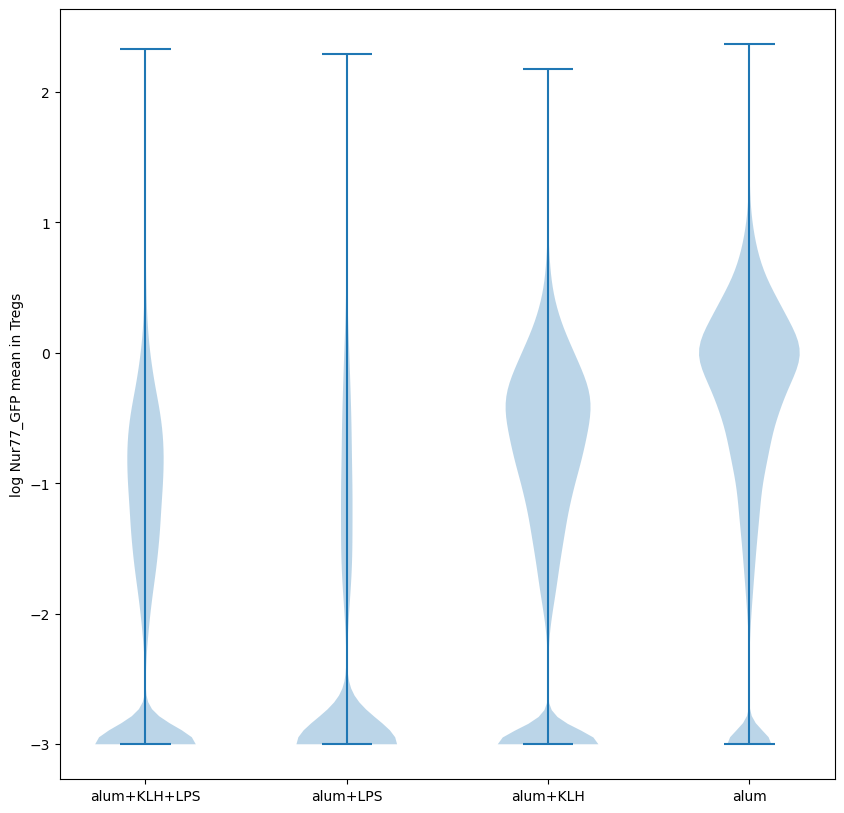

In [3]:
plt.violinplot(Treg_Nur77_series_log)
plt.ylabel('log Nur77_GFP mean in Tregs')
plt.xticks([1,2,3,4],['alum+KLH+LPS','alum+LPS','alum+KLH','alum'])